In [2]:
# feed_forward_fully_connected neural network

import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) #fully__connected_flat_layer(input,output)
        self.fc2 = nn.Linear(64, 64) # first layer has 28*28 features/pixels 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) # 3 hidden layers, the 2nd layer takes 64 inputs as output
                                     # of the previous layer is 64,in the end we have 10 outputs 
                                     # for the 10 digits
                
    def forward(self, x): # data transfer path
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x)) # here we can put conditions(if/else, etc) to generate some really advanced models
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # no rectified linear activator function for output
        
        return F.log_softmax(x, dim=1) # probability distribution for output
                                       # dim=0 implies distribution across batches
                                       # dim=1 implies the same across output
    
        
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
X = torch.rand([28,28])
X = X.view([-1,28*28]) # -1 for any size array or tensor (unknown shape)
                       # it is basically [1,784] here

In [8]:
output = net(X)

In [9]:
output

tensor([[-2.3166, -2.2047, -2.3956, -2.3082, -2.3013, -2.3055, -2.3844, -2.3041,
         -2.1904, -2.3346]], grad_fn=<LogSoftmaxBackward>)

In [12]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) #(parameters that can be modified, learning rate)

EPOCHS = 3 # 3 full passes over the data
for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels 
        X, y = data
        net.zero_grad()
        output = net(X.view([-1, 28*28]))
        loss = F.nll_loss(output, y)   # loss calculator, one hot vector, ex-[0,1,0,0]
                                       # use mean squared error for one hot vector
                                       # here, data is scalar , so we use nll_loss
        loss.backward() # backpropagation-apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)     # print loss. We hope loss (a measure of wrong-ness) declines! 
    
        
        
        
        

tensor(0.0036, grad_fn=<NllLossBackward>)
tensor(0.0062, grad_fn=<NllLossBackward>)
tensor(0.0374, grad_fn=<NllLossBackward>)


In [13]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy : ", round(correct/total, 3))  

Accuracy :  0.972


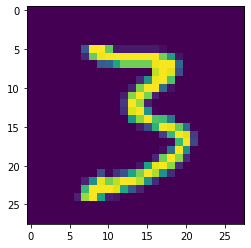

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view([28,28]))

In [19]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(3)
